In [174]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('affairs.csv')
df.head()

,affair_count,is_male,age,years_married,have_kids,religiousness_1to5,years_of_education,hollingshead_occupation_code,marriage_rating_1to5
0,0,1,37.0,10.00,0,3,18,7,4
1,0,0,27.0,4.00,0,4,14,6,4
2,0,0,32.0,15.00,1,1,12,1,4
3,0,1,57.0,15.00,1,5,18,6,5
4,0,1,22.0,0.75,0,2,17,6,3


In [176]:
y = df['hollingshead_occupation_code']
X = df[['have_kids','years_of_education','religiousness_1to5']]
X = sm.add_constant(X)  

In [178]:
model = sm.MNLogit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 1.377020
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                               MNLogit Regression Results                               
========================================================================================
Dep. Variable:     hollingshead_occupation_code   No. Observations:                  601
Model:                                  MNLogit   Df Residuals:                      577
Method:                                     MLE   Df Model:                           18
Date:                          Wed, 10 Apr 2024   Pseudo R-squ.:                  0.1574
Time:                                  20:29:49   Log-Likelihood:                -827.59
converged:                                 True   LL-Null:                       -982.21
Covariance Type:                      nonrobust   LLR p-value:                 6.059e-55
==================================================================================================
hollingshead_occupation_code=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.2225      2.536      0.876      0.381      -2.748       7.193
have_kids                          0.4503      1.085      0.415      0.678      -1.677       2.577
years_of_education                -0.3248      0.145     -2.236      0.025      -0.609      -0.040
religiousness_1to5                -0.0867      0.266     -0.326      0.745      -0.609       0.435
--------------------------------------------------------------------------------------------------
hollingshead_occupation_code=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.5315      1.526      2.315      0.021       0.541       6.522
have_kids                         -1.5697      0.413     -3.802      0.000      -2.379      -0.760
years_of_education                -0.1396      0.091     -1.527      0.127      -0.319       0.040
religiousness_1to5                -0.4107      0.159     -2.576      0.010      -0.723      -0.098
--------------------------------------------------------------------------------------------------
hollingshead_occupation_code=4       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.7831      1.363     -1.309      0.191      -4.454       0.888
have_kids                         -1.4738      0.374     -3.941      0.000      -2.207      -0.741
years_of_education                 0.1513      0.079      1.911      0.056      -0.004       0.306
religiousness_1to5                 0.0355      0.140      0.254      0.800      -0.239       0.310
--------------------------------------------------------------------------------------------------
hollingshead_occupation_code=5       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.4452      1.138     -4.783      0.000      -7.676      -3.214
have_kids                         -1.1112      0.327     -3.394      0.001      -1.753      -0.470
years_of_education                 0.4645      0.066      7.017      0.000       0.335       0.594
religiousness_1to5                -0.1053      0.112     -0.937      0.349      -0.326       0.115
--------------------------------------------------------------------------------------------------
hollingshead_occupation_code=6       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -15.0850      1.548     -9.745      0.000     -18

In [180]:
yhats = result.predict(X)
yhats

,0,1,2,3,4,5,6
0,0.034185,0.000703,0.027623,0.097360,0.459902,0.363993,0.016235
1,0.173674,0.012005,0.162669,0.279841,0.328070,0.036846,0.006895
2,0.362268,0.097582,0.320041,0.088802,0.122024,0.005017,0.004266
3,0.098719,0.002677,0.007302,0.069143,0.354120,0.428935,0.039103
4,0.053844,0.001671,0.075430,0.127216,0.505813,0.221614,0.014412
...,...,...,...,...,...,...,...
596,0.362268,0.097582,0.320041,0.088802,0.122024,0.005017,0.004266
597,0.083796,0.002948,0.021247,0.052754,0.412277,0.389820,0.037157
598,0.143433,0.006982,0.041817,0.077621,0.443504,0.252120,0.034522
599,0.088847,0.002866,0.014941,0.057958,0.393430,0.404016,0.037942


In [182]:
#Creating prediction frames w/ span and mean variables
X['education_span'] = np.linspace(X['years_of_education'].min(), X['years_of_education'].max(), len(X))
X['religion_span'] = np.linspace(X['religiousness_1to5'].min(), X['religiousness_1to5'].max(), len(X))

X['have_kids_mean'] = X['have_kids'].mean()
X['religion_mean'] = X['religiousness_1to5'].mean()
X['education_mean'] = X['years_of_education'].mean()

prediction_frame1 = X[['const','have_kids_mean','education_mean','religion_span']]
prediction_frame2 = X[['const','have_kids_mean','education_span','religion_mean']]

            0         1         2         3         4         5         6
0    0.144805  0.008866  0.111774  0.101397  0.463376  0.147370  0.022412
1    0.144898  0.008867  0.111540  0.101486  0.463347  0.147442  0.022421
2    0.144991  0.008867  0.111306  0.101575  0.463318  0.147514  0.022429
3    0.145083  0.008868  0.111072  0.101664  0.463289  0.147585  0.022438
4    0.145176  0.008869  0.110839  0.101753  0.463259  0.147657  0.022447
..        ...       ...       ...       ...       ...       ...       ...
596  0.193437  0.008391  0.029204  0.156000  0.407341  0.179844  0.025783
597  0.193508  0.008390  0.029135  0.156095  0.407204  0.179883  0.025786
598  0.193580  0.008388  0.029066  0.156189  0.407068  0.179922  0.025789
599  0.193651  0.008386  0.028997  0.156283  0.406931  0.179960  0.025792
600  0.193722  0.008384  0.028928  0.156378  0.406795  0.179999  0.025795

[601 rows x 7 columns]


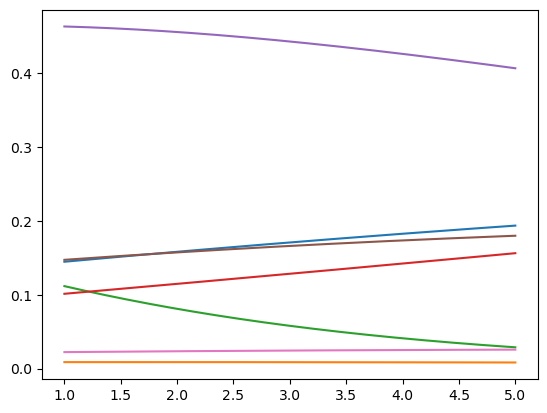

In [184]:
#Probability of Category by Religiosity
yhat_probabilities1 = result.predict(prediction_frame1)
print(yhat_probabilities1)
plt.plot(religion_span,yhat_probabilities1)

            0         1         2         3         4         5         6
0    0.363308  0.189862  0.319744  0.092759  0.033347  0.000330  0.000651
1    0.363813  0.188997  0.319370  0.093146  0.033679  0.000336  0.000659
2    0.364315  0.188135  0.318993  0.093533  0.034014  0.000342  0.000668
3    0.364814  0.187274  0.318614  0.093922  0.034352  0.000349  0.000676
4    0.365310  0.186415  0.318232  0.094310  0.034693  0.000356  0.000685
..        ...       ...       ...       ...       ...       ...       ...
596  0.017754  0.000267  0.003399  0.023674  0.260701  0.668954  0.025251
597  0.017498  0.000261  0.003342  0.023398  0.259144  0.671190  0.025167
598  0.017246  0.000256  0.003285  0.023124  0.257589  0.673416  0.025084
599  0.016997  0.000251  0.003230  0.022853  0.256038  0.675632  0.025000
600  0.016751  0.000246  0.003175  0.022585  0.254489  0.677840  0.024915

[601 rows x 7 columns]


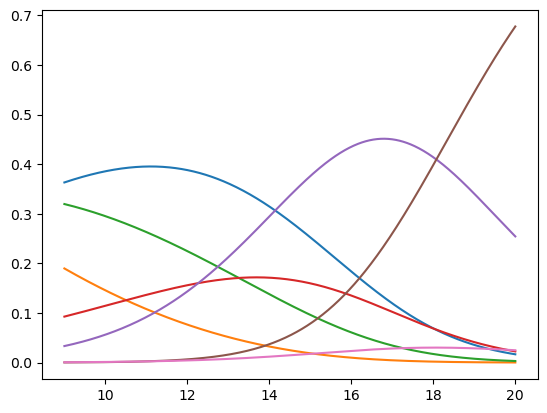

In [186]:
#Probability of Category by Years of Education 
yhat_probabilities2 = result.predict(prediction_frame2)
print(yhat_probabilities2)
plt.plot(education_span,yhat_probabilities2)

Text(0.5, 1.0, 'Predicted Probability of Hollingshead Occupation Code by Years of Education')

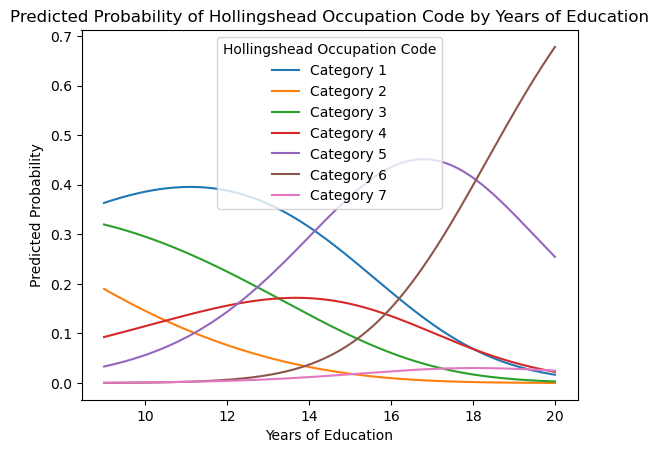

In [188]:
yhat_probabilities2.columns = range(1, 8)

for category in yhat_probabilities2.columns:
    plt.plot(education_span, yhat_probabilities2[category], label=f'Category {category}')

plt.legend(title='Hollingshead Occupation Code')
plt.xlabel('Years of Education')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probability of Hollingshead Occupation Code by Years of Education')